In [14]:
# custom model

In [15]:
# training

In [49]:
import tensorflow as tf

data_dir = r"..\fruits classification\train"
batch_size = 32
image_size = (32, 32)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='validation',
    seed=123
)

# Preprocess the data
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.one_hot(y, 6)
  return x, y

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
)


Found 10901 files belonging to 6 classes.
Using 8721 files for training.
Found 10901 files belonging to 6 classes.
Using 2180 files for validation.
Epoch 1/20
273/273 [==============================] - 210s 745ms/step - loss: 0.9346 - accuracy: 0.7128 - val_loss: 1.8015 - val_accuracy: 0.4028
Epoch 2/20
273/273 [==============================] - 184s 659ms/step - loss: 0.4733 - accuracy: 0.8371 - val_loss: 0.6398 - val_accuracy: 0.7394
Epoch 3/20
273/273 [==============================] - 98s 339ms/step - loss: 0.3673 - accuracy: 0.8717 - val_loss: 0.4655 - val_accuracy: 0.8312
Epoch 4/20
273/273 [==============================] - 59s 214ms/step - loss: 0.2997 - accuracy: 0.8943 - val_loss: 0.5912 - val_accuracy: 0.8376
Epoch 5/20
273/273 [==============================] - 63s 229ms/step - loss: 0.2626 - accuracy: 0.9076 - val_loss: 0.5140 - val_accuracy: 0.8188
Epoch 6/20
273/273 [==============================] - 65s 237ms/step - loss: 0.2372 - accuracy: 0.9182 - val_loss: 0.2446 - v

In [50]:
# model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_23 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

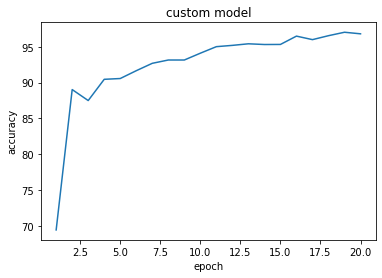

In [17]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = [69.46,89.02,87.49,90.45,90.56,91.65,92.68,93.14,93.14,94.09,95.00,95.18,95.40,95.30,95.31,96.47,95.98,96.53,97.01,96.79]

plt.plot(x,y)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("custom model")
plt.show()

In [18]:
# testing

In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"..\fruits classification\test",
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.1,
    subset='training',
    seed=123
)

test_ds = test_ds.map(preprocess)

Found 2698 files belonging to 6 classes.
Using 2429 files for training.


In [7]:
test_loss, test_acc = model.evaluate(test_ds)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

76/76 [==============================] - 39s 447ms/step - loss: 0.1180 - accuracy: 0.9601
Test loss: 0.11804208159446716
Test accuracy: 0.9600658416748047


In [21]:
# leNet-5

In [22]:
# training

In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, Dense

data_dir = r"..\fruits classification\train"
batch_size = 32
image_size = (32, 32)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='validation',
    seed=123
)

# Preprocess the data
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.one_hot(y, 6)
  return x, y

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

# Instantiate an empty sequential model
model = Sequential()
# C1 Convolutional Layer
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh', input_shape = (32,32,3), padding = 'same'))
  
# S2 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
  
# C3 Convolutional Layer
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1,activation = 'tanh',padding = 'valid'))
 
# S4 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
  
# C5 Convolutional Layer
model.add(Conv2D(filters = 12, kernel_size = 5, strides = 1,activation = 'tanh',padding = 'valid'))
  
# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())
  
# FC6 Fully Connected Layer
model.add(Dense(units = 20, activation = 'tanh'))
  
# FC7 Output layer with softmax activation
model.add(Dense(units = 6, activation = 'softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
)


Found 10901 files belonging to 6 classes.
Using 8721 files for training.
Found 10901 files belonging to 6 classes.
Using 2180 files for validation.
Epoch 1/20
273/273 [==============================] - 169s 603ms/step - loss: 1.1463 - accuracy: 0.5567 - val_loss: 0.9777 - val_accuracy: 0.6408
Epoch 2/20
273/273 [==============================] - 11s 41ms/step - loss: 0.8225 - accuracy: 0.7014 - val_loss: 0.7645 - val_accuracy: 0.7321
Epoch 3/20
273/273 [==============================] - 17s 63ms/step - loss: 0.6948 - accuracy: 0.7538 - val_loss: 0.6168 - val_accuracy: 0.7817
Epoch 4/20
273/273 [==============================] - 15s 55ms/step - loss: 0.5882 - accuracy: 0.7964 - val_loss: 0.6055 - val_accuracy: 0.7881
Epoch 5/20
273/273 [==============================] - 15s 55ms/step - loss: 0.5207 - accuracy: 0.8238 - val_loss: 0.4972 - val_accuracy: 0.8243
Epoch 6/20
273/273 [==============================] - 20s 72ms/step - loss: 0.4742 - accuracy: 0.8369 - val_loss: 0.4880 - val_acc

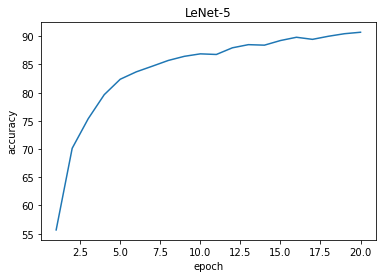

In [19]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = [55.67,70.14,75.38,79.64,82.38,83.69,84.69,85.71,86.44,86.88,86.77,87.95,88.51,88.42,89.24,89.82,89.45,90.00,90.45,90.71]

plt.plot(x,y)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("LeNet-5")
plt.show()

In [20]:
# testing

In [14]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"..\fruits classification\test",
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.1,
    subset='training',
    seed=123
)

test_ds = test_ds.map(preprocess)

Found 2698 files belonging to 6 classes.
Using 2429 files for training.


In [15]:
test_loss, test_acc = model.evaluate(test_ds)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

76/76 [==============================] - 37s 432ms/step - loss: 0.3469 - accuracy: 0.8761
Test loss: 0.34685394167900085
Test accuracy: 0.8760806918144226


In [23]:
# AlexNet

In [24]:
# training

In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, Dense, BatchNormalization

data_dir = r"..\fruits classification\train"
batch_size = 32
image_size = (32, 32)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='validation',
    seed=123
)

# Preprocess the data
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.one_hot(y, 6)
  return x, y

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

# Instantiate an empty sequential model
model = Sequential()
# 1st layer (conv + pool + batchnorm)
model.add(Conv2D(filters= 96, kernel_size= (11,11), strides=(4,4), activation = 'relu', padding='valid', input_shape = (32,32,3))) 
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(BatchNormalization())
    
# 2nd layer (conv + pool + batchnorm)
model.add(Conv2D(filters=96, kernel_size=(5,5), strides=(1,1), activation = 'relu', padding='same')) 
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(BatchNormalization())
            
# layer 3 (conv + batchnorm)      <--- note that the authors did not add a POOL layer here
model.add(Conv2D(filters=396, kernel_size=(3,3), strides=(1,1), activation = 'relu', padding='same')) 
model.add(BatchNormalization())
        
# layer 4 (conv + batchnorm)     <--- similar to layer 4
model.add(Conv2D(filters=396, kernel_size=(3,3), strides=(1,1), activation = 'relu', padding='same')) 
model.add(BatchNormalization())
           
# layer 5 (conv + batchnorm) 
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation = 'relu', padding='same')) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
  
# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())
  
# layer 6 (Dense layer + dropout) 
model.add(Dense(units = 2096, activation = 'relu'))
model.add(Dropout(0.5))
  
# layer 7 (Dense layers)
model.add(Dense(units = 1096, activation = 'relu'))
model.add(Dropout(0.5))
                          
# layer 8 (softmax output layer)
model.add(Dense(units = 6, activation = 'softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
)

Found 10901 files belonging to 6 classes.
Using 8721 files for training.
Found 10901 files belonging to 6 classes.
Using 2180 files for validation.
Epoch 1/20
273/273 [==============================] - 115s 406ms/step - loss: 1.5366 - accuracy: 0.6625 - val_loss: 2.1480 - val_accuracy: 0.4353
Epoch 2/20
273/273 [==============================] - 68s 246ms/step - loss: 0.7329 - accuracy: 0.7726 - val_loss: 2.1247 - val_accuracy: 0.4679
Epoch 3/20
273/273 [==============================] - 73s 267ms/step - loss: 0.6074 - accuracy: 0.8166 - val_loss: 0.6420 - val_accuracy: 0.8064
Epoch 4/20
273/273 [==============================] - 73s 266ms/step - loss: 0.5352 - accuracy: 0.8367 - val_loss: 0.9962 - val_accuracy: 0.7229
Epoch 5/20
273/273 [==============================] - 72s 263ms/step - loss: 0.5047 - accuracy: 0.8420 - val_loss: 1.7508 - val_accuracy: 0.5908
Epoch 6/20
273/273 [==============================] - 74s 268ms/step - loss: 0.4645 - accuracy: 0.8642 - val_loss: 0.5014 - va

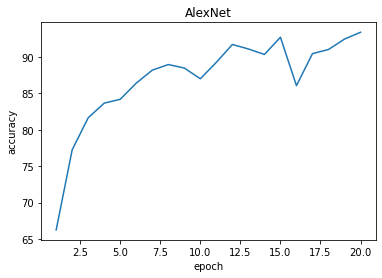

In [25]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = [66.25,77.26,81.66,83.67,84.20,86.42,88.20,88.97,88.49,87.02,89.28,91.73,91.11,90.36,92.72,86.07,90.47,91.04,92.47,93.41]

plt.plot(x,y)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("AlexNet")
plt.show()

In [26]:
# testing

In [12]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"..\fruits classification\test",
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.1,
    subset='training',
    seed=123
)

test_ds = test_ds.map(preprocess)

Found 2698 files belonging to 6 classes.
Using 2429 files for training.


In [13]:
test_loss, test_acc = model.evaluate(test_ds)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

76/76 [==============================] - 52s 627ms/step - loss: 0.4903 - accuracy: 0.8596
Test loss: 0.4903201162815094
Test accuracy: 0.8596130013465881


In [33]:
# comparision between training data of three models

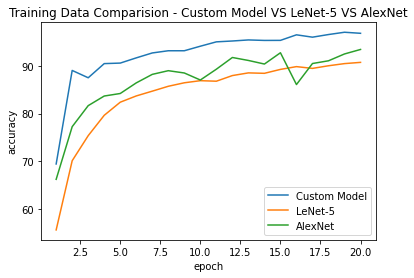

In [32]:
import matplotlib.pyplot as plt
# custom model
xc = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
yc = [69.46,89.02,87.49,90.45,90.56,91.65,92.68,93.14,93.14,94.09,95.00,95.18,95.40,95.30,95.31,96.47,95.98,96.53,97.01,96.79]
# LeNet-5
xl = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
yl = [55.67,70.14,75.38,79.64,82.38,83.69,84.69,85.71,86.44,86.88,86.77,87.95,88.51,88.42,89.24,89.82,89.45,90.00,90.45,90.71]
# AlexNet
xa = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ya = [66.25,77.26,81.66,83.67,84.20,86.42,88.20,88.97,88.49,87.02,89.28,91.73,91.11,90.36,92.72,86.07,90.47,91.04,92.47,93.41]

plt.title("Training Data Comparision - Custom Model VS LeNet-5 VS AlexNet")
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.plot(xc,yc,label="Custom Model")
plt.plot(xl,yl,label="LeNet-5")
plt.plot(xa,ya,label="AlexNet")
plt.legend()
plt.show()

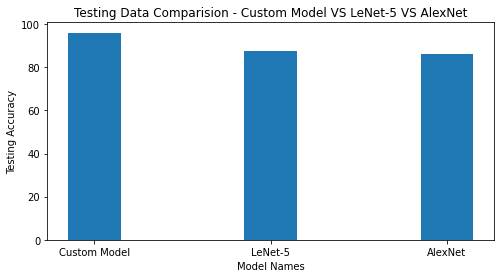

In [42]:
import numpy as np
import matplotlib.pyplot as plt
 
data = {'Custom Model':96.00, 'LeNet-5':87.60, 'AlexNet':85.96}
model_names = list(data.keys())
training_acc = list(data.values())
  
fig = plt.figure(figsize = (8, 4))
 
# creating the bar plot
plt.bar(model_names, training_acc,width = 0.3)
 
plt.xlabel("Model Names")
plt.ylabel("Testing Accuracy")
plt.title("Testing Data Comparision - Custom Model VS LeNet-5 VS AlexNet")

plt.show()

In [43]:
# checking #

In [47]:
from PIL import Image
import numpy as np

# Read the image file
image = Image.open(r"..\new_images\rotated_by_15_Screen Shot 2018-06-07 at 2.16.18 PM.png")

# Preprocess the image
image = image.resize((32, 32))
image = np.array(image)
image = image / 255.0
image = image.astype(np.float32)
image = np.expand_dims(image, axis=0)

In [48]:
prediction = model.predict(image)
class_names = ['fresh_apple', 'fresh_banana', 'fresh_orange', 'rotten_apple', 'rotten_banana', 'rotten_orange']

predicted_class = class_names[np.argmax(prediction)]
print(predicted_class)

1/1 [==============================] - 1s 1s/step
rotten_apple
